In [1]:
#############################Polynomial Regression##########################
############################################################################
#import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import random
############################################################################
# Read the CSV file as a DataFrame
df = pd.read_csv('data.csv')
# Read the inputs and output
x = df[['i1', 'i2']]
y = df[['o1']]  
############################################################################
# Set random seed for Python's random module
random.seed(42)
np.random.seed(42)
############################################################################
# Train test split using SKLearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=43)
############################################################################
# Create polynomial features-degree=1
poly_features1 = PolynomialFeatures(degree=1, include_bias=False)
X_train_poly1 = poly_features1.fit_transform(X_train)
model1 = LinearRegression()
model1.fit(X_train_poly1, y_train)
############################################################################
# Create polynomial features-degree=2
poly_features2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly2 = poly_features2.fit_transform(X_train)
model2 = LinearRegression()
model2.fit(X_train_poly2, y_train)
############################################################################
# Create polynomial features-degree=3
poly_features3 = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly3 = poly_features3.fit_transform(X_train)
model3 = LinearRegression()
model3.fit(X_train_poly3, y_train)

LinearRegression()

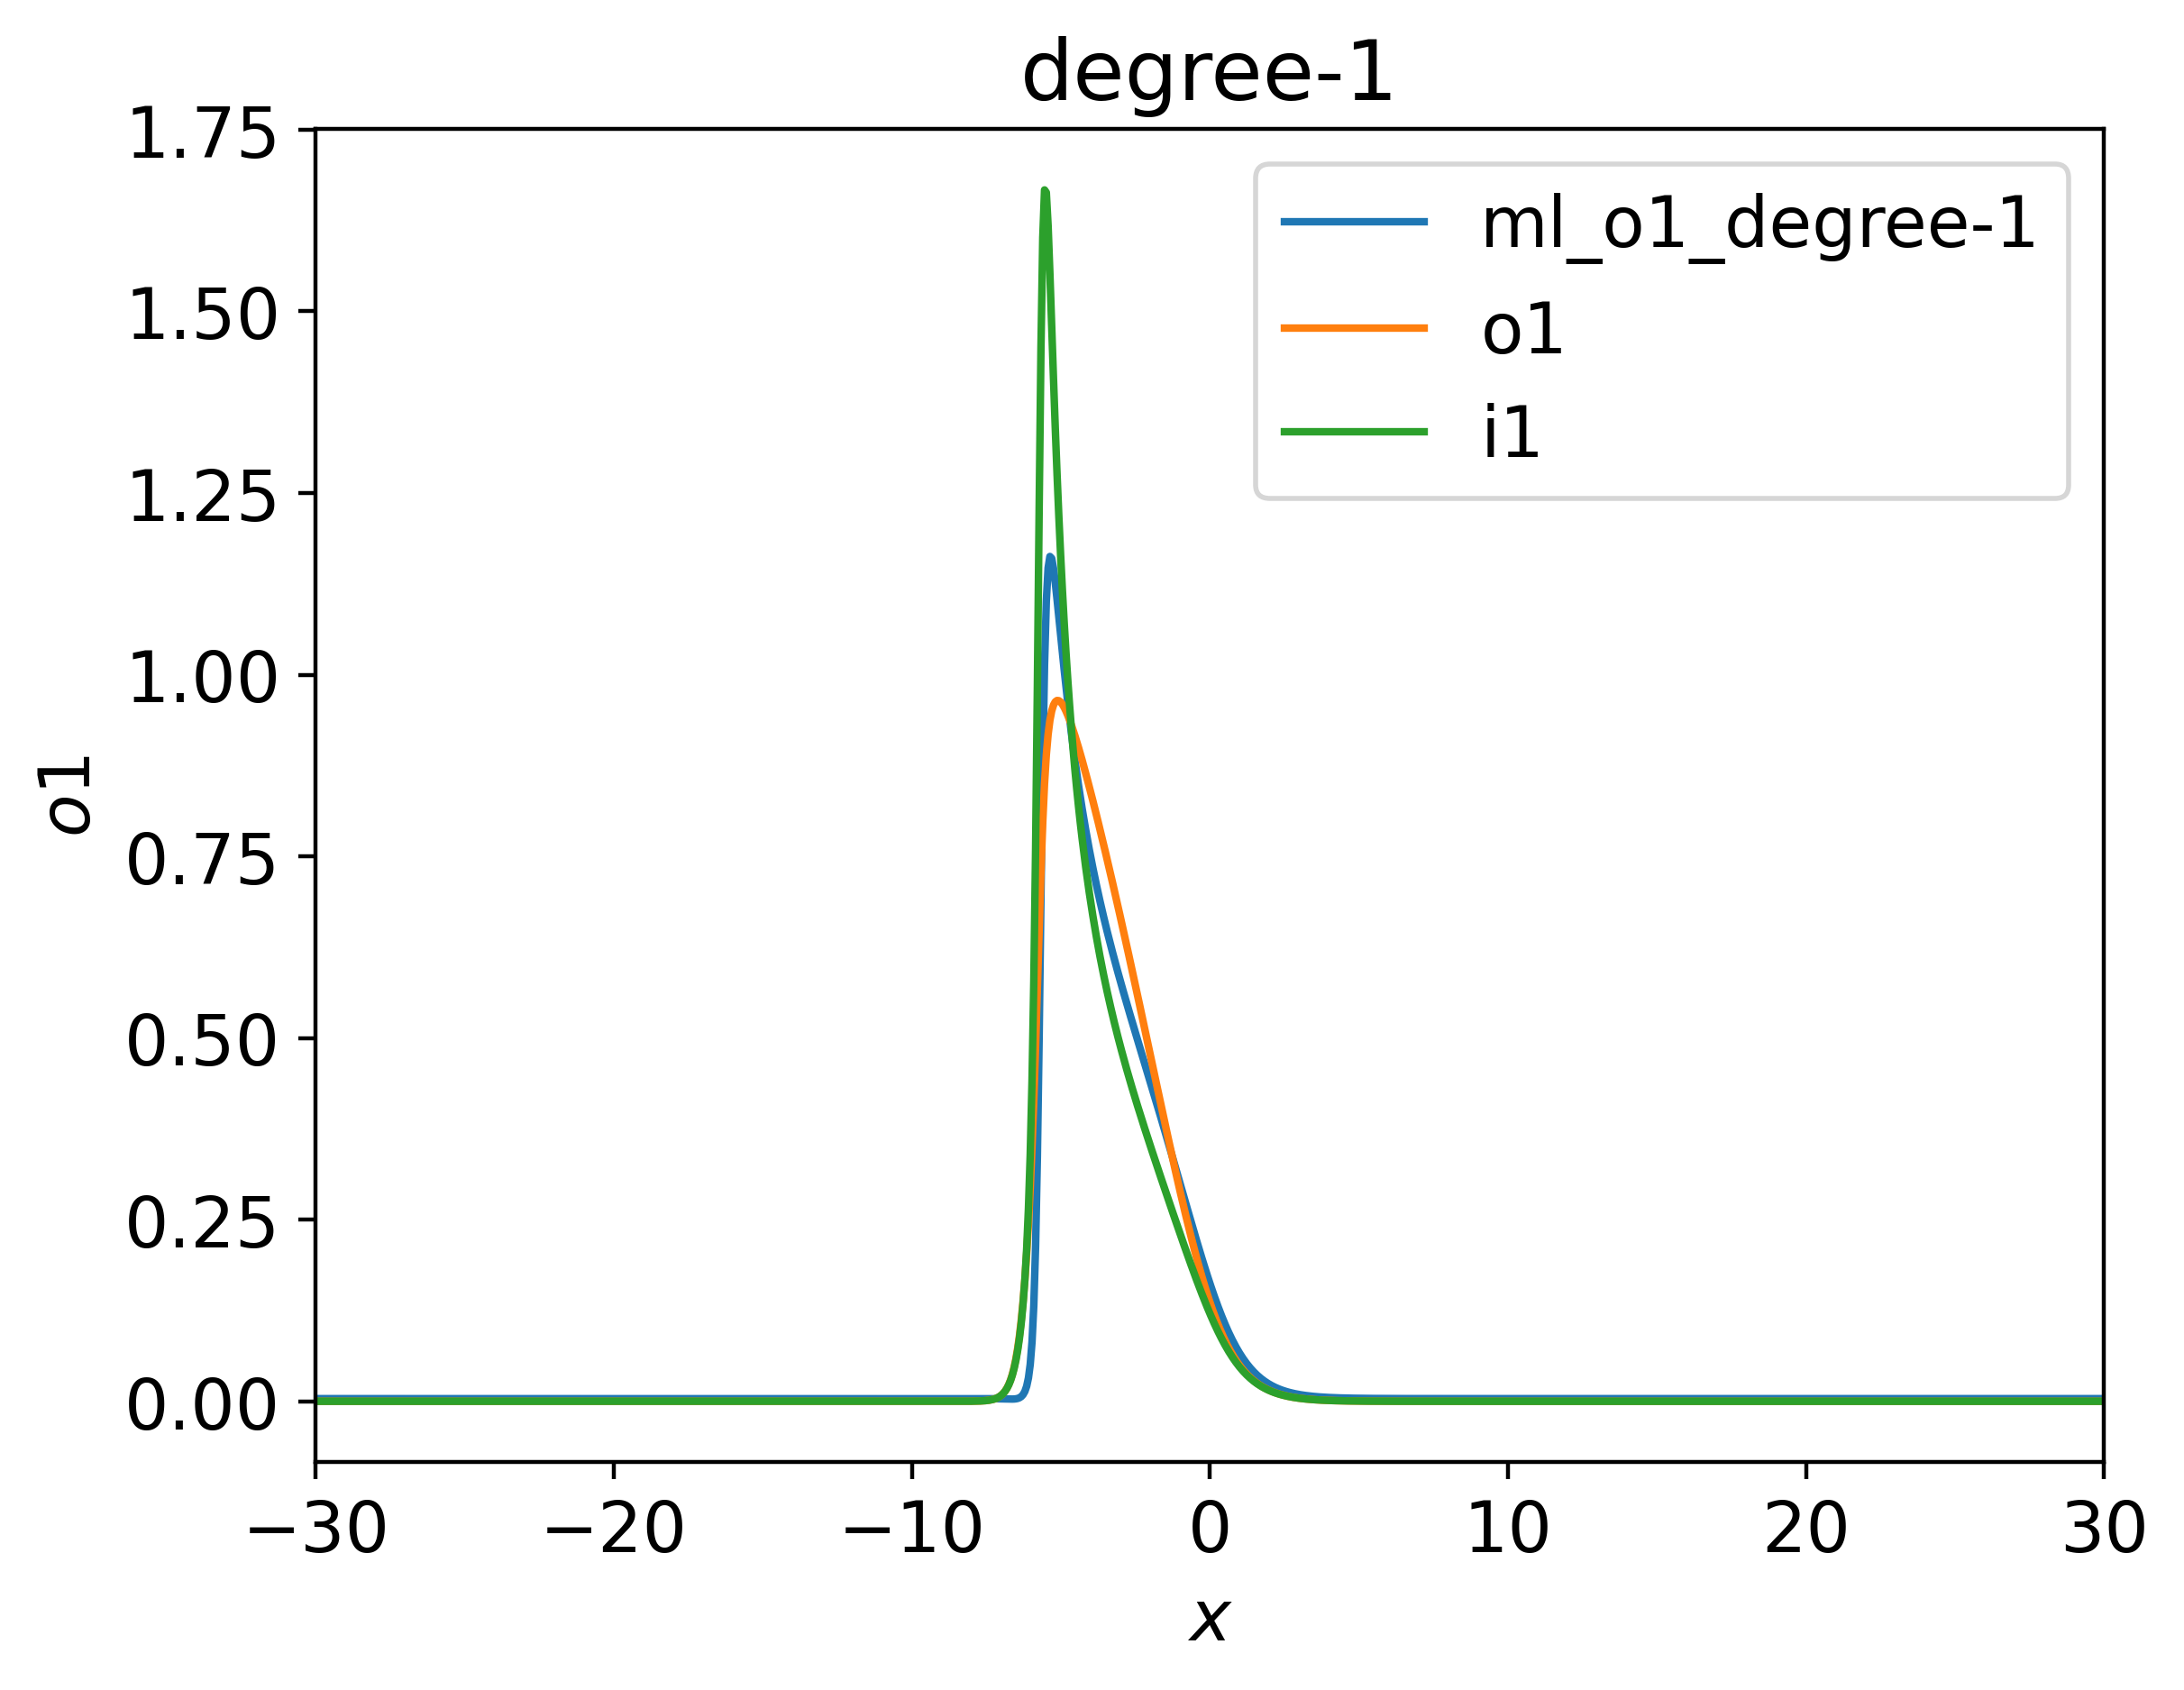

In [2]:
########################################################
import seaborn
from pylab import *
mpl.rcParams['figure.dpi'] = 400
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
########################################################
# Read the CSV file into a DataFrame
df = pd.read_csv('data.csv')
# Read the inputs
xin = df[['i1', 'i2']]
########################################################
# Create polynomial features for the input features
xin_poly1 = poly_features1.transform(xin)
xin_poly2 = poly_features2.transform(xin)
xin_poly3 = poly_features3.transform(xin)
########################################################
#Prediction
ypred1 = model1.predict(xin_poly1)
ypred1 = pd.DataFrame(ypred1)

ypred2 = model2.predict(xin_poly2)
ypred2 = pd.DataFrame(ypred2)

ypred3 = model3.predict(xin_poly3)
ypred3 = pd.DataFrame(ypred3)
########################################################
x = df['x']
# Plot the x-y data
plt.plot(x, ypred1, linestyle='-', label='ml_o1_degree-1')
plt.plot(x, df['o1'], linestyle='-', label='o1')
plt.plot(x, df['i1'], linestyle='-', label='i1')
plt.legend()
# Add labels and title
plt.xlabel(r"$x$")
plt.ylabel(r'$o1$')
plt.title('degree-1')
plt.xlim(-30, 30)
plt.savefig('o1.png', bbox_inches='tight')
# Display the plot
plt.show()

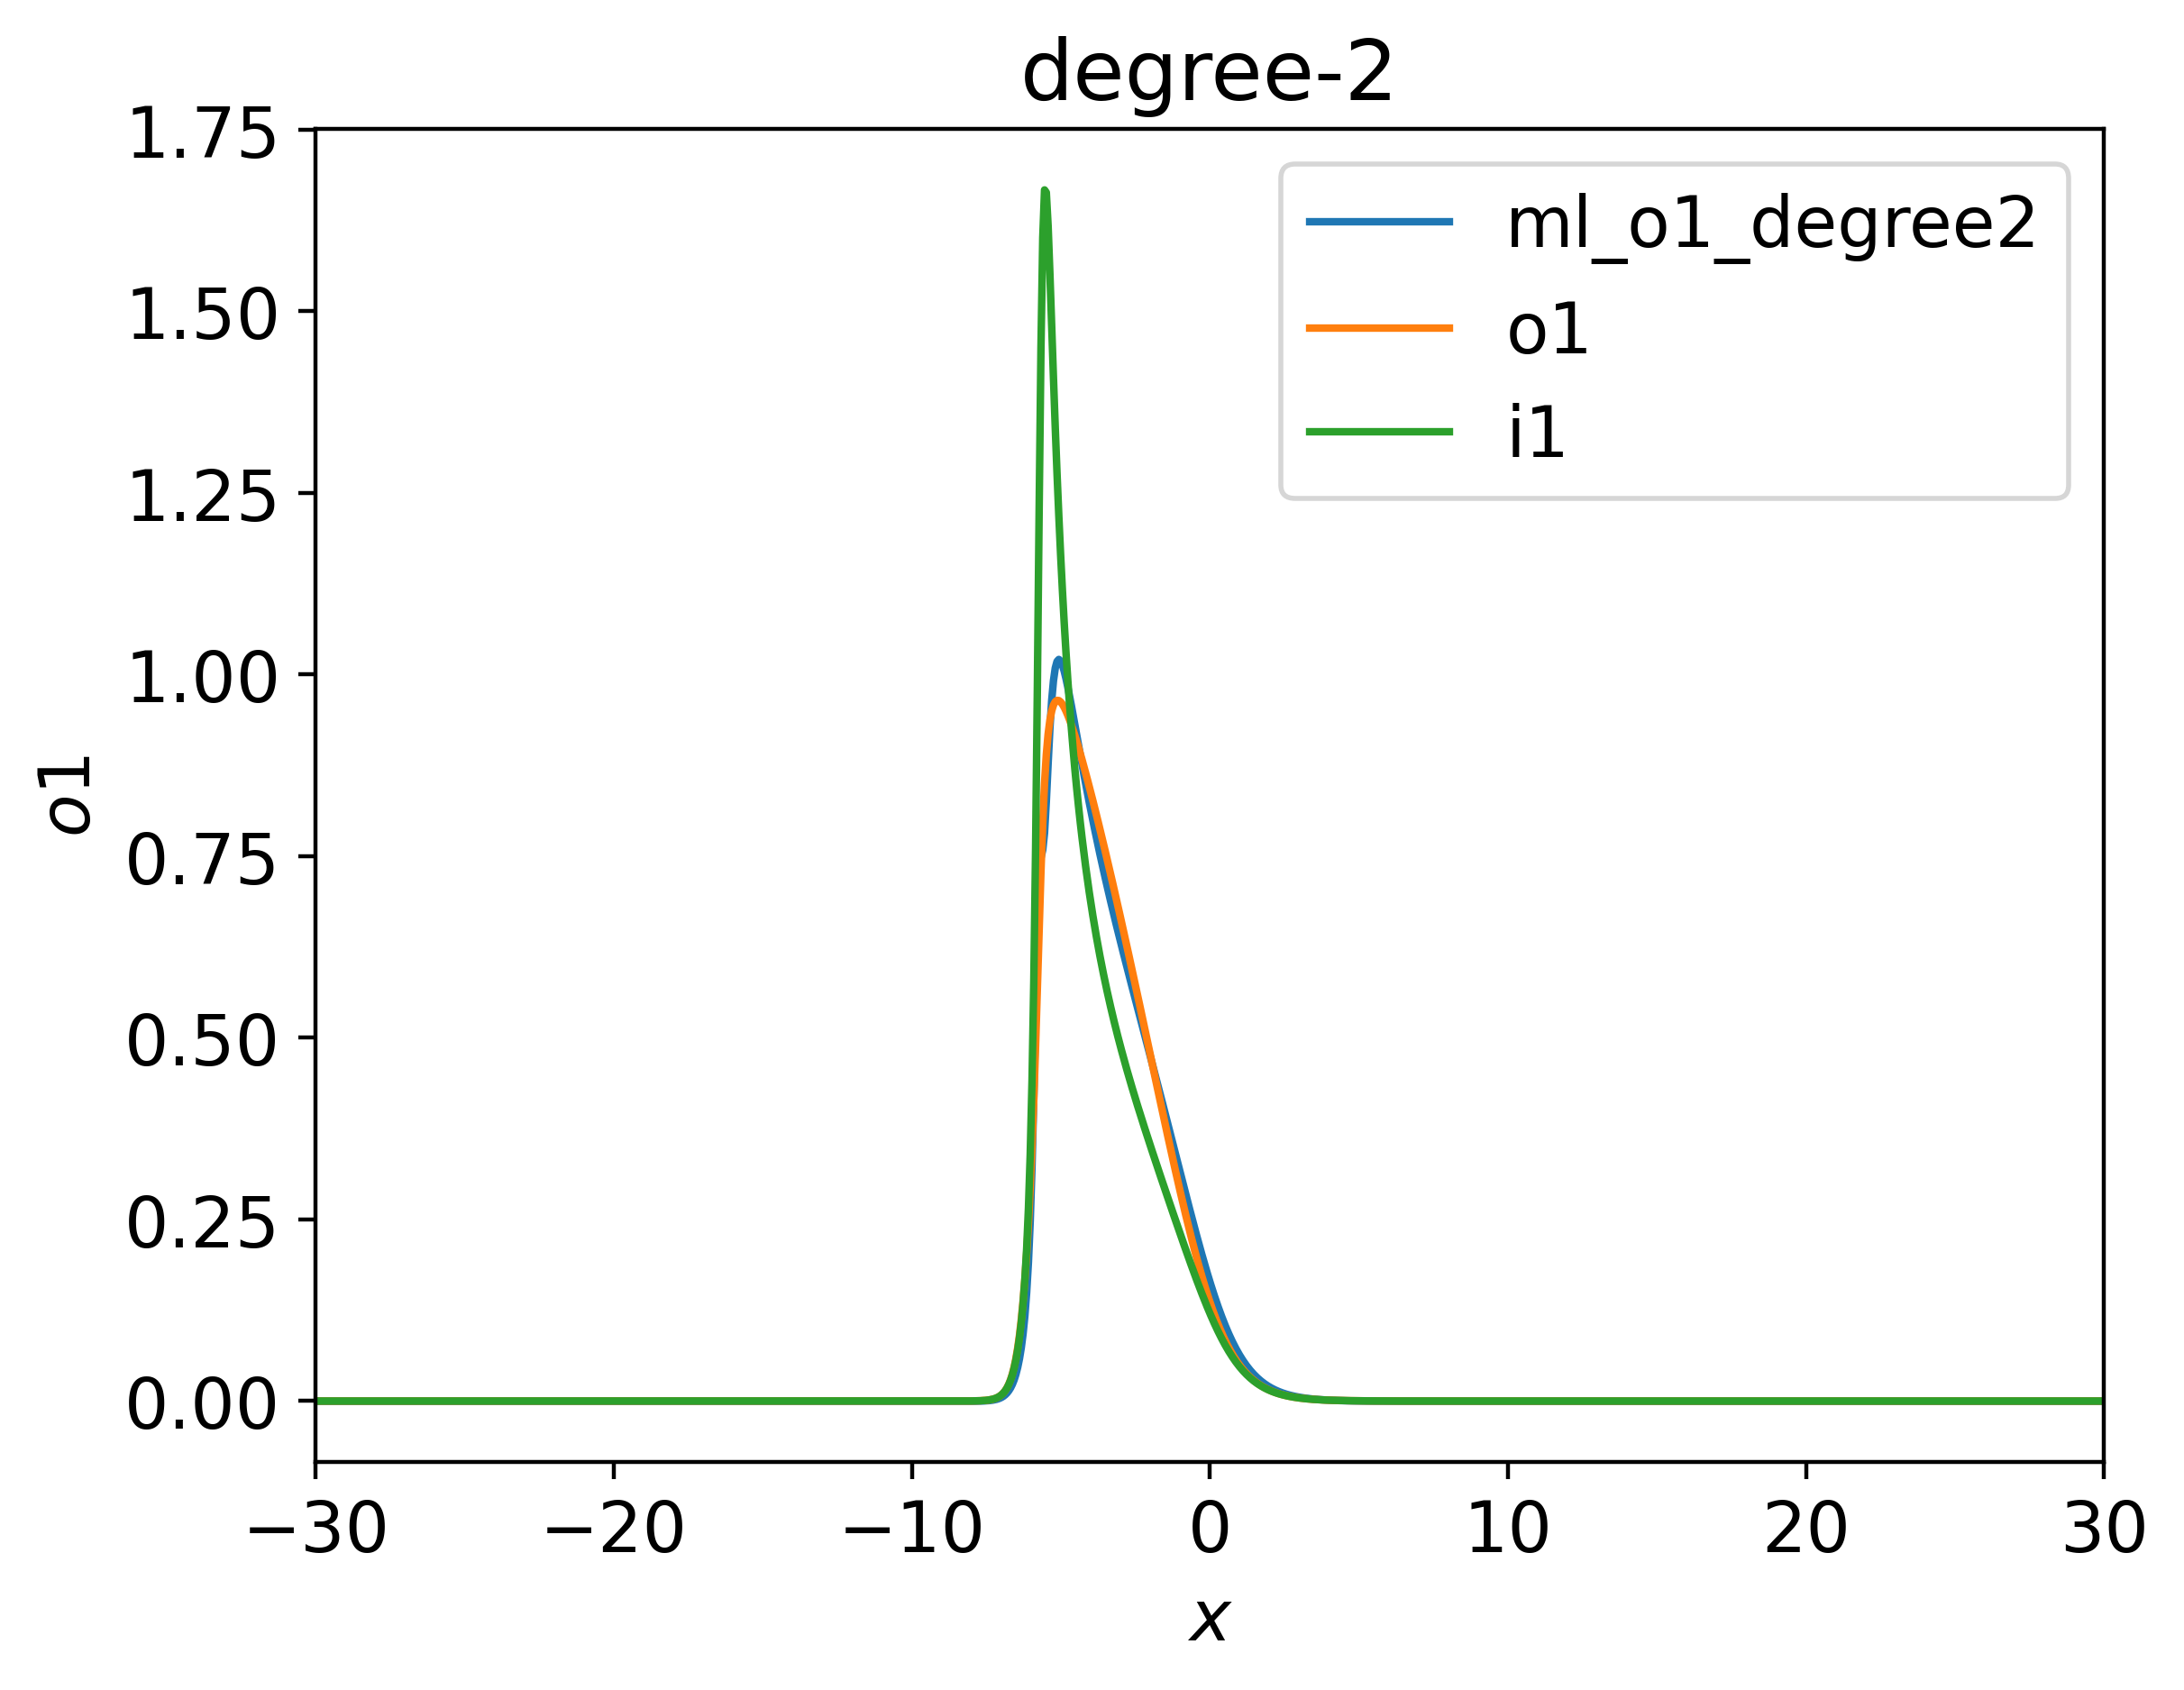

In [3]:
# Plot the x-y data
plt.plot(x, ypred2, linestyle='-', label='ml_o1_degree2')
plt.plot(x, df['o1'], linestyle='-', label='o1')
plt.plot(x, df['i1'], linestyle='-', label='i1')
plt.legend()
plt.xlabel(r"$x$")
plt.ylabel(r'$o1$')
plt.title('degree-2')
plt.xlim(-30, 30)
plt.savefig('o1.png', bbox_inches='tight')
plt.show()

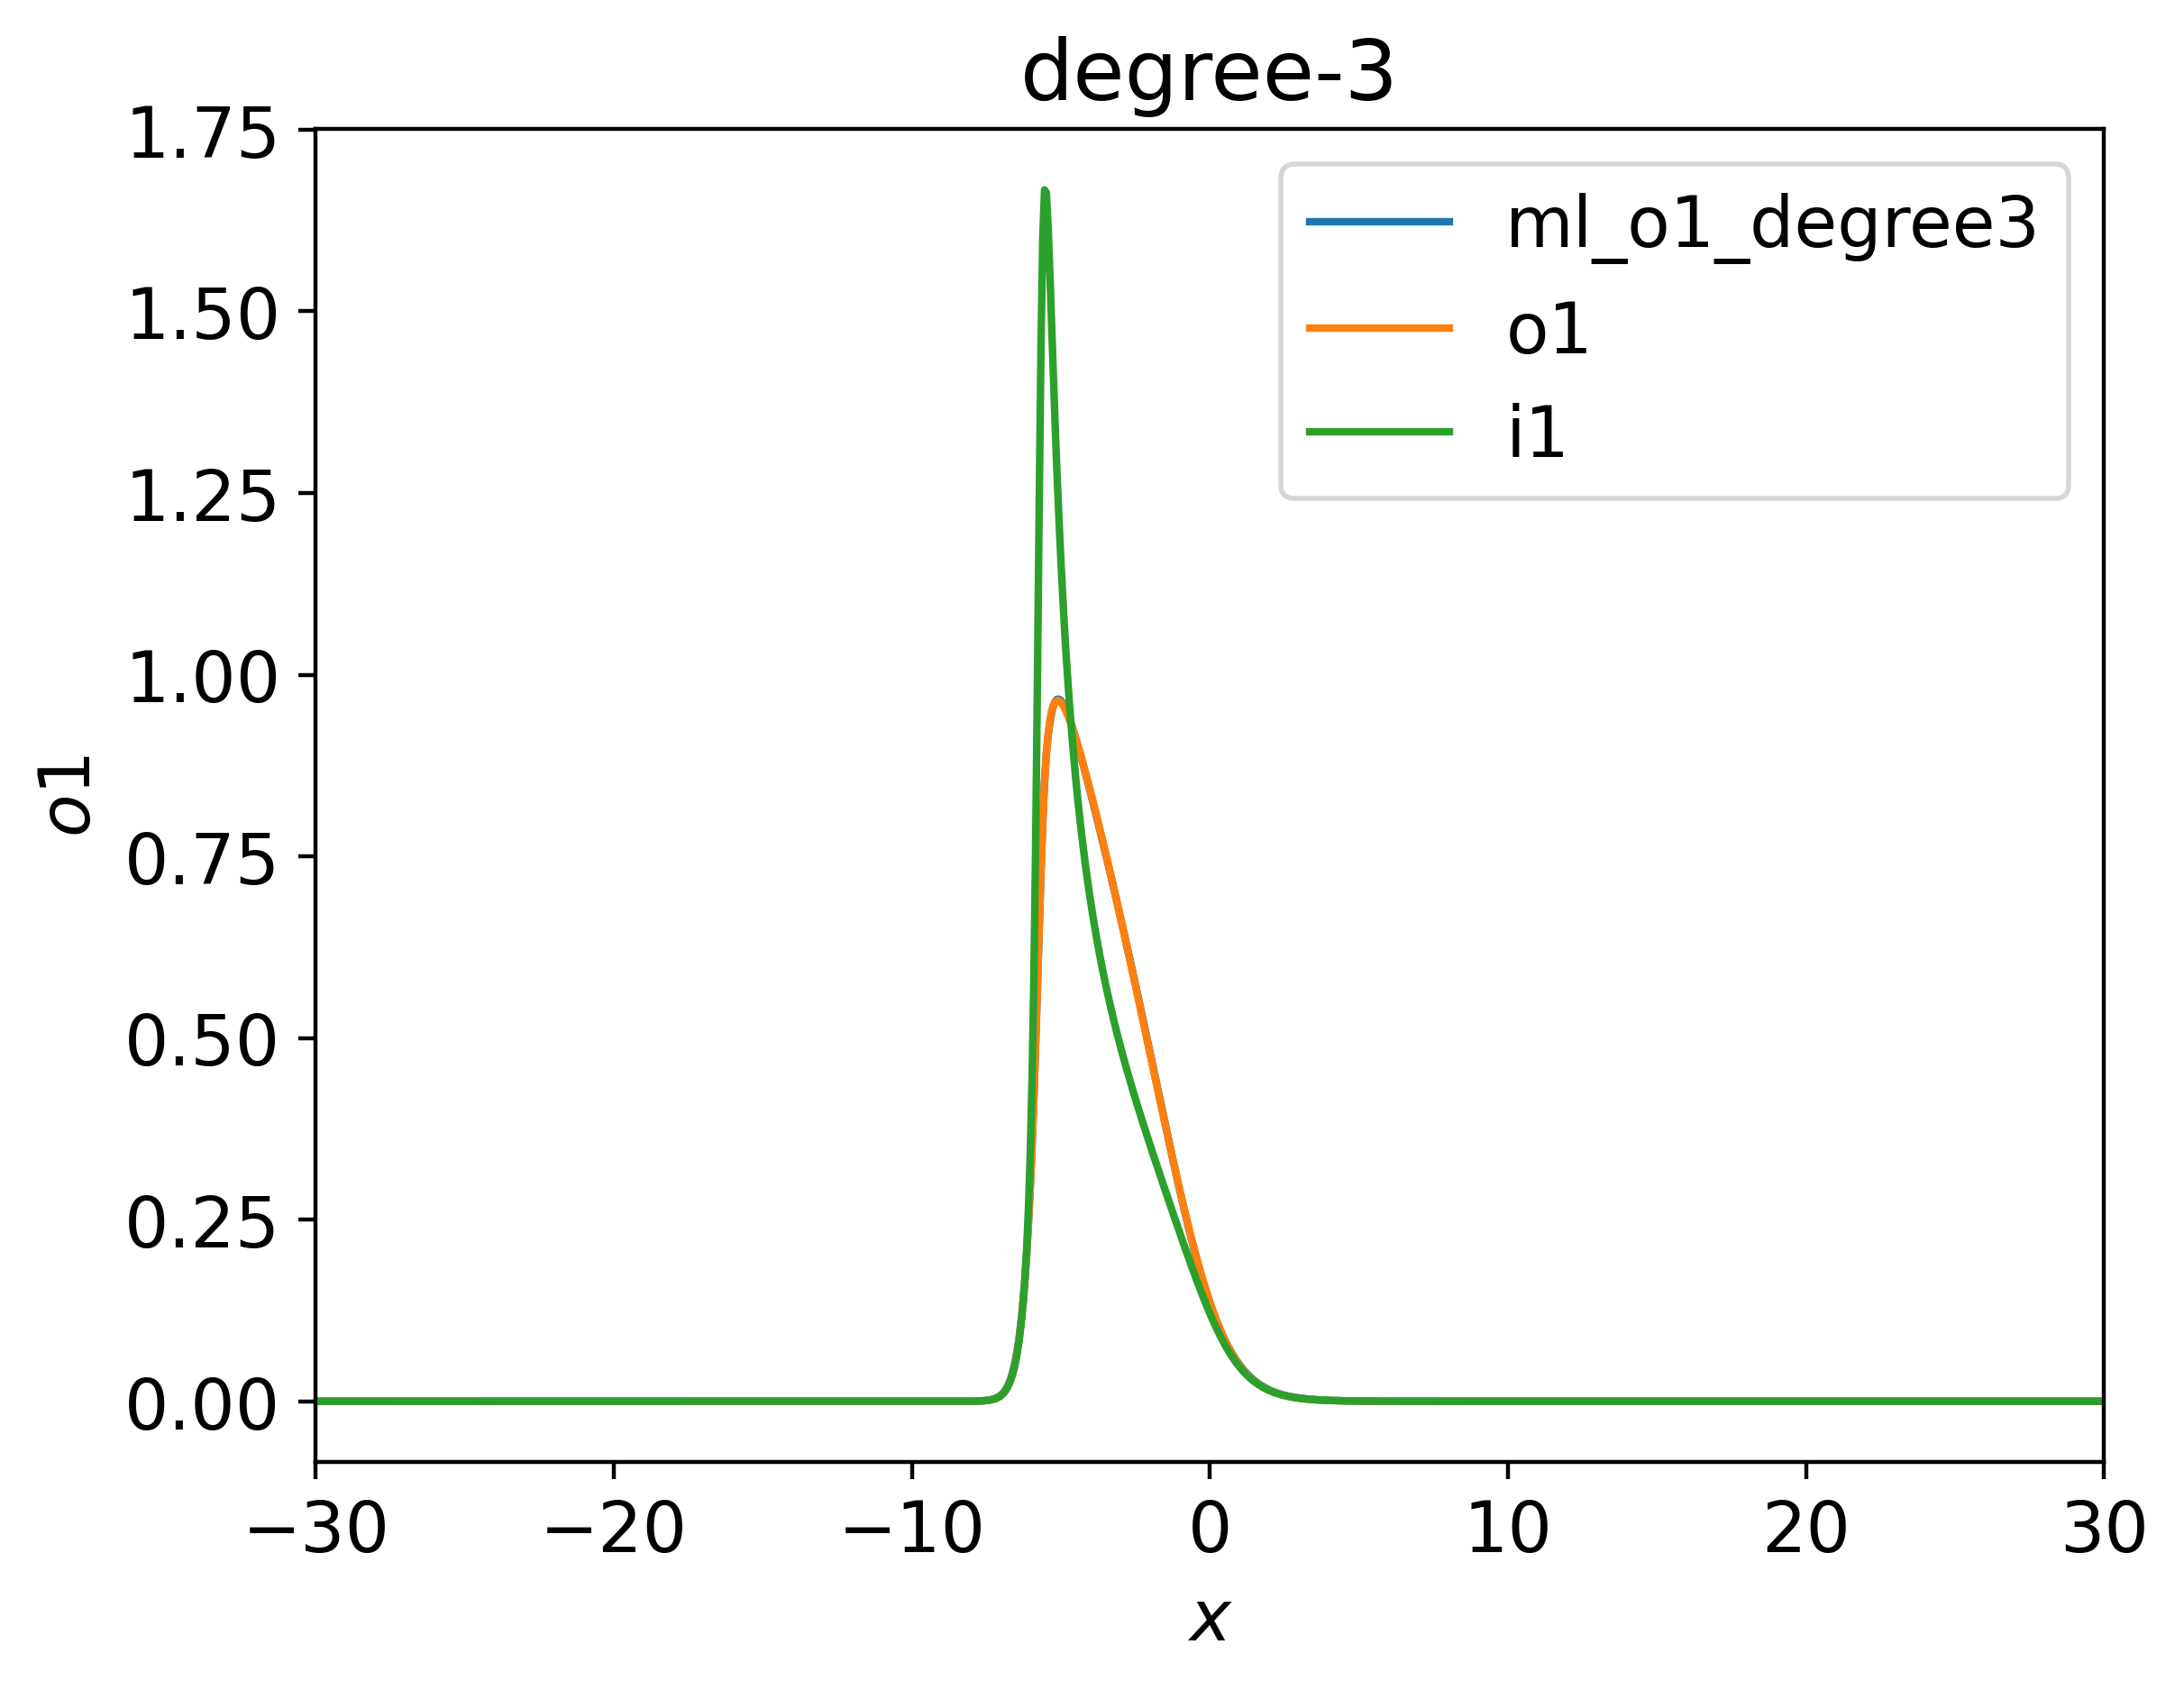

In [4]:
# Plot the x-y data
plt.plot(x, ypred3, linestyle='-', label='ml_o1_degree3')
plt.plot(x, df['o1'], linestyle='-', label='o1')
plt.plot(x, df['i1'], linestyle='-', label='i1')
plt.legend()
plt.xlabel(r"$x$")
plt.ylabel(r'$o1$')
plt.title('degree-3')
plt.xlim(-30, 30)
plt.savefig('o1.png', bbox_inches='tight')
plt.show()

In [5]:
#Model Equation: degree=1
coefficients = model1.coef_
intercept = model1.intercept_
feature_names = X_train.columns
model_equation = f"y = {intercept[0]}"
for i, feature in enumerate(feature_names):
    model_equation += f" + {coefficients[0][i]} * {feature}"
print("Model Equation: degree=1")
print(model_equation)

Model Equation: degree=1
y = 0.0036674387483487947 + 1.4524347679640934 * i1 + 0.2483153508717133 * i2


In [6]:
#Model Equation: degree=2
coefficients = model2.coef_
intercept = model2.intercept_
feature_names = X_train.columns
model_equation = f"y = {intercept[0]}"
for i in range(len(feature_names)):
    model_equation += f" + {coefficients[0][i]} * {feature_names[i]}"
for i in range(len(feature_names)):
    for j in range(i, len(feature_names)):
        model_equation += f" + {coefficients[0][len(feature_names) + i]} * {feature_names[i]} * {feature_names[j]}"
print("Model Equation: degree=2")
print(model_equation)

Model Equation: degree=2
y = -0.0003707020812628095 + 1.396612618587019 * i1 + 0.12833002372272087 * i2 + 0.5856711824788501 * i1 * i1 + 0.5856711824788501 * i1 * i2 + 0.5390291382198042 * i2 * i2


In [7]:
#Model Equation: degree=3
coefficients = model3.coef_
intercept = model3.intercept_
feature_names = X_train.columns
model_equation = f"y = {intercept[0]}"
for i in range(len(feature_names)):
    model_equation += f" + {coefficients[0][i]} * {feature_names[i]}"
for i in range(len(feature_names)):
    for j in range(i, len(feature_names)):
        model_equation += f" + {coefficients[0][len(feature_names) + i]} * {feature_names[i]} * {feature_names[j]}"
for i in range(len(feature_names)):
    for j in range(i, len(feature_names)):
        for k in range(j, len(feature_names)):
            model_equation += f" + {coefficients[0][2 * len(feature_names) + i]} * {feature_names[i]} * {feature_names[j]} * {feature_names[k]}"
print("Model Equation:")
print(model_equation)

Model Equation:
y = -3.069634037432961e-05 + 1.0520986644816561 * i1 + -0.005135655949070944 * i2 + 2.4123877230459203 * i1 * i1 + 2.4123877230459203 * i1 * i2 + 5.4766556728258555 * i2 * i2 + 0.8350565996493707 * i1 * i1 * i1 + 0.8350565996493707 * i1 * i1 * i2 + 0.8350565996493707 * i1 * i2 * i2 + 9.1021009837472 * i2 * i2 * i2
